**This project aims to analyze student performance data to identify key factors influencing academic success. The dataset includes various demographic and academic variables, such as gender, ethnicity, parental education, lunch type, and test preparation course, along with math, reading, and writing scores. By applying statistical techniques and data visualization methods, this analysis seeks to understand the relations that impact student academic outcomes. The study will explore differences in performance across various groups, assess the role of external factors in academic achievement, and determine which attributes contribute most to student success. Through this analysis, valuable insights can be gained to support educational improvements and better decision-making in student learning strategies.**

_**Study subject** = HighSchool Students_
_**Authors**= Ahmed Bohazza, Bibi Nahida Shaik_

In [432]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
# import os 
# print(os.getcwd)

In [434]:
school_prfmc = pd.read_csv("StudentsPerformance.csv") 

## Going over the data (Can skip)

In [437]:
school_prfmc.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [439]:
school_prfmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [441]:
school_prfmc.head(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


## Analysing the data (Can Skip)

In [444]:
school_prfmc.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [446]:
school_prfmc['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [516]:
school_prfmc['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [518]:
school_prfmc['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [520]:
school_prfmc['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [522]:
school_prfmc['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [612]:
# school_prfmc.groupby('parental level of education')['math score'].describe()

In [550]:
# school_prfmc['parents education']=
# school_prfmc['parental level of education'].apply(lambda x: pd.Series(change_edu(x)))

## Data Cleaning (Must run before visualization)

### Adding columns

#### Defined  a function that will return a list of two values based on the ethnicity/race column [race,ethnicity]

In [450]:
def ethnicity(string):
  if string == "group A":
      ethnicity = ['White','Britsh']#'White-British'
  elif string == "group B":
      ethnicity = ['White','Irish'] #'Whiten Irish'
  elif string == "group C":
      ethnicity = ['White','Other'] #'Other White Races'
  elif string == "group D":
      ethnicity = ['Mix','White and black Caribbean']#'White and black Carrabian'
  elif string == "group E":
      ethnicity = ['Mix','White and black Caribbean'] #'White Asian'
  else:
      ethnicity=["unKnown",'Unknown']
  return ethnicity

#### Defined a new column for parents education the combines all higher education in one category and the rest under highschool

In [453]:
# def change_edu(edu):
#     if edu in ["associate's degree", "bachelor's degree" , "master's degree","some college"]:
#         level='Higher level education'
#     else:
#         level='High school'
#     return level
        
change_edu={"associate's degree":'Higher Education',
           "bachelor's degree":'Higher Education',
           "master's degree":"Higher Education",
           "some college":'Higher Education',
          'some high school':'High School',
          'high school':'High School'}
school_prfmc['parents edu']=school_prfmc['parental level of education'].map(change_edu)

In [455]:
# The function is applied here using apply function, pd.Series function to converts the list into a Pandas Series, which allows it to be split into separate columns.
school_prfmc[['Race','Ethnicity']]=school_prfmc["race/ethnicity"].apply(lambda x: pd.Series(ethnicity(x)))

#### Additional column to show the pass /fail based on avg for each student

In [457]:
# df['Average_Score'] = my.iloc[:, 1:].mean(axis=1)
school_prfmc['Average score'] = school_prfmc[["math score", "reading score", "writing score"]].mean(axis=1).round(2)

In [458]:
# def categorize_score(x):
#     if x >= 90:
#         value='Excellent'
#     elif x >= 80:
#         value= 'Very Good'
#     elif x >= 70:
#         value= 'Good'
#     elif x >= 60:
#         value= 'poor'
#     else:
#         value= 'Fail'
#     return value
# school_prfmc['Average pass'] =school_prfmc['Average score'].apply(categorize_score)
# (school_prfmc['Average pass'].value_counts(normalize=True)*100).plot(kind='barh', color= sns.color_palette())
# (school_prfmc['Average pass'].value_counts(normalize=True)*100)

school_prfmc['Average pass'] =school_prfmc['Average score'].apply(lambda x:'Pass' if x>=60 else 'Fail')

In [459]:
school_prfmc[['Math_pass','Reading_pass','Writing_pass']]=school_prfmc[['math score',
                                                                        'reading score',
                                                                        'writing score']].applymap(lambda x:'Pass' if x>=60 else  'Fail')

C:\Users\angel\AppData\Local\Temp\ipykernel_23704\3861796619.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  'writing score']].applymap(lambda x:'Pass' if x>=60 else  'Fail')


#### To Categorize the score distribution

In [461]:
def categorize_score(avg_score):
    if avg_score >= 90:
        return '90+'
    elif avg_score >= 80:
        return '80+'
    elif avg_score >= 70:
        return '70+'
    elif avg_score >= 60:
        return '60+'
    else:
        return 'Below 60'

school_prfmc['Score Category'] = school_prfmc['Average score'].apply(categorize_score)

In [462]:
school_prfmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   parents edu                  1000 non-null   object 
 9   Race                         1000 non-null   object 
 10  Ethnicity                    1000 non-null   object 
 11  Average score                1000 non-null   float64
 12  Average pass                 1000 non-null   object 
 13  Math_pass          

In [463]:
school_prfmc.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parents edu,Race,Ethnicity,Average score,Average pass,Math_pass,Reading_pass,Writing_pass,Score Category
0,female,group B,bachelor's degree,standard,none,72,72,74,Higher Education,White,Irish,72.67,Pass,Pass,Pass,Pass,70+
1,female,group C,some college,standard,completed,69,90,88,Higher Education,White,Other,82.33,Pass,Pass,Pass,Pass,80+
2,female,group B,master's degree,standard,none,90,95,93,Higher Education,White,Irish,92.67,Pass,Pass,Pass,Pass,90+
3,male,group A,associate's degree,free/reduced,none,47,57,44,Higher Education,White,Britsh,49.33,Fail,Fail,Fail,Fail,Below 60
4,male,group C,some college,standard,none,76,78,75,Higher Education,White,Other,76.33,Pass,Pass,Pass,Pass,70+


## Visualization

In [71]:
# school_prfmc.head(5)

### 1-find average score for each student **DONE**

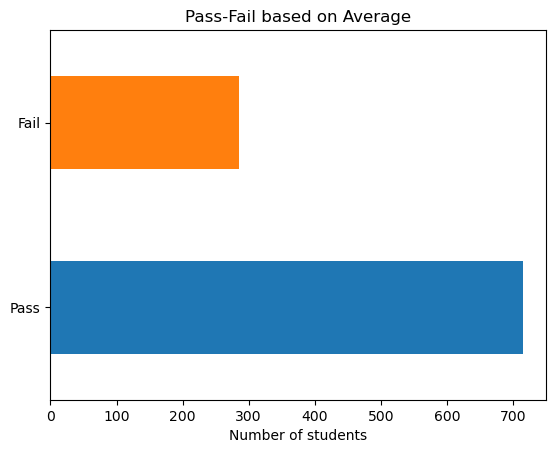

In [598]:
school_prfmc['Average pass'].value_counts().plot(kind='barh', color= sns.color_palette())
plt.title('Pass-Fail based on Average')
plt.xlabel('Number of students')
plt.ylabel('')
plt.savefig('PASSFAIL')

C:\Users\angel\AppData\Local\Temp\ipykernel_23704\1389950150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=school_prfmc, x='Score Category', palette='Set1', order=category_order)


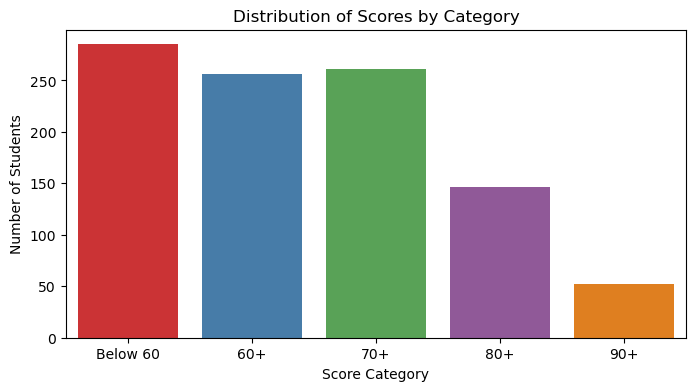

<Figure size 640x480 with 0 Axes>

In [522]:
category_order = ['Below 60', '60+', '70+', '80+', '90+']
plt.figure(figsize=(8, 4))

sns.countplot(data=school_prfmc, x='Score Category', palette='Set1', order=category_order)

# for p in plt.gca().patches:
#     plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
#                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Scores by Category')
plt.xlabel('Score Category')
plt.ylabel('Number of Students')
plt.show()
plt.savefig('Distribution of Scores by Category')

### 2- Find the gender/ avg score  which better **DONE**

In [476]:
school_prfmc.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parents edu,Race,Ethnicity,Average score,Average pass,Math_pass,Reading_pass,Writing_pass,Score Category
0,female,group B,bachelor's degree,standard,none,72,72,74,Higher Education,White,Irish,72.67,Pass,Pass,Pass,Pass,70+
1,female,group C,some college,standard,completed,69,90,88,Higher Education,White,Other,82.33,Pass,Pass,Pass,Pass,80+
2,female,group B,master's degree,standard,none,90,95,93,Higher Education,White,Irish,92.67,Pass,Pass,Pass,Pass,90+
3,male,group A,associate's degree,free/reduced,none,47,57,44,Higher Education,White,Britsh,49.33,Fail,Fail,Fail,Fail,Below 60
4,male,group C,some college,standard,none,76,78,75,Higher Education,White,Other,76.33,Pass,Pass,Pass,Pass,70+


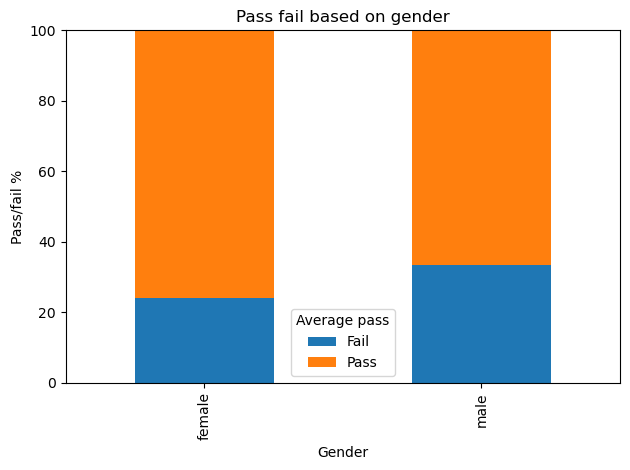

In [478]:
genderPassFail=(school_prfmc.groupby('gender')['Average pass'].value_counts(normalize=True).unstack()*100).plot(kind='bar', ylim=(0,100), stacked=True)
genderPassFail.set_xlabel('Gender')
genderPassFail.set_ylabel('Pass/fail %')
genderPassFail.set_title('Pass fail based on gender')
plt.tight_layout()
plt.savefig('Gender PassFail')

### 3- Find the gender/ avg score  which better with each sub **DONE**

In [480]:
# # This is to verify the results
# for i, s in enumerate(subjects):
#     (school_prfmc.groupby([school_prfmc.gender])[s].value_counts(normalize=True).unstack()*100).round(1)['Pass'].plot(kind='barh', title = s)
# plt.show()


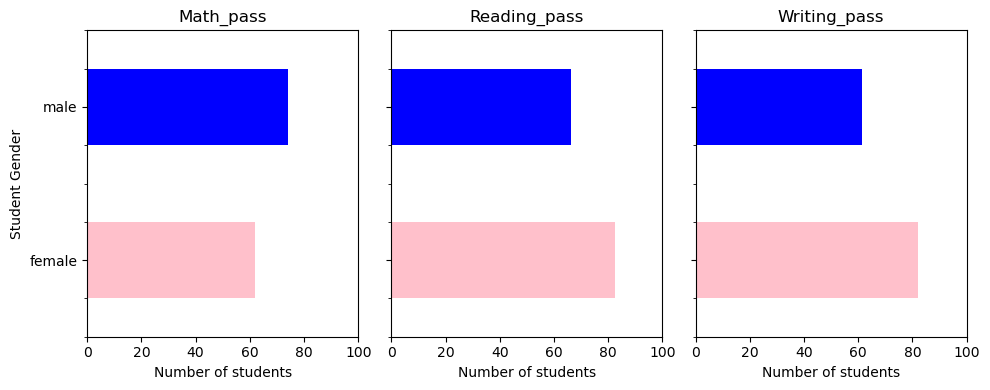

In [530]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex = True)
subjects=['Math_pass','Reading_pass','Writing_pass']
# palette=['green','blue','red']
# n=0
for i, s in enumerate(subjects):
    
    # school_prfmc[school_prfmc[s]=='Pass'].groupby([school_prfmc.gender, school_prfmc[s]])[s].count().unstack().plot(kind='bar',
    (school_prfmc.groupby([school_prfmc.gender])[s].value_counts(normalize=True).unstack()*100).round(1)['Pass'].plot(kind='barh',
                                                                                                                      ax=axes[i],
                                                                                                                      ylabel='Student Gender',
                                                                                                                      xlabel='Number of students',
                                                                                                                      title= s, xlim=(0,100),
                                                                                                                      color=['pink', 'blue'])
    # n+=1

# # Reading Pass/Fail
# school_prfmc.groupby([school_prfmc.gender, school_prfmc.Reading_pass]).Reading_pass.count().unstack().plot(kind='bar',
#                                                                                                            ax=axes[1],
#                                                                                                            xlabel='Student Gender',
#                                                                                                            ylabel='Number of students',
#                                                                                                            title='Reading Pass/Fail')

# school_prfmc.groupby([school_prfmc.gender, school_prfmc.Writing_pass]).Writing_pass.count().unstack().plot(kind='bar',
#                                                                                                            ax=axes[2],
#                                                                                                            xlabel='Student Gender',
#                                                                                                            ylabel='Number of students',
#                                                                                                            title='Writing Pass/Fail')

plt.tight_layout() 
plt.savefig('Pass students by gender for different subs')
# filt=school_prfmc['Math_pass']=='Pass'
# school_prfmc.groupby(['gender',filt])

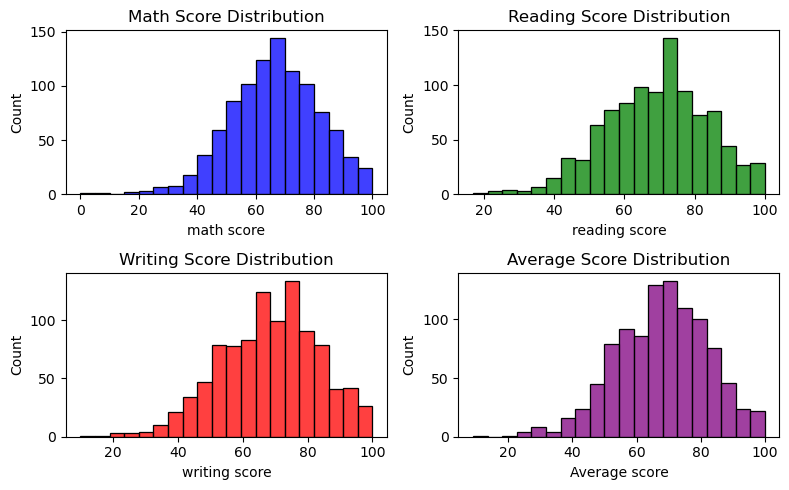

In [484]:
plt.figure(figsize=(8, 5))
plt.subplot(2, 2, 1)
sns.histplot(school_prfmc['math score'], color='blue', bins=20)
plt.title('Math Score Distribution')

plt.subplot(2, 2, 2)
sns.histplot(school_prfmc['reading score'],color='green', bins=20)
plt.title('Reading Score Distribution')

plt.subplot(2, 2, 3)
sns.histplot(school_prfmc['writing score'], color='red', bins=20)
plt.title('Writing Score Distribution')

plt.subplot(2, 2, 4)
sns.histplot(school_prfmc['Average score'], color='purple', bins=20)
plt.title('Average Score Distribution')

plt.tight_layout()
plt.show()


### 4- race and ethnicity and parental level of education/avg score?

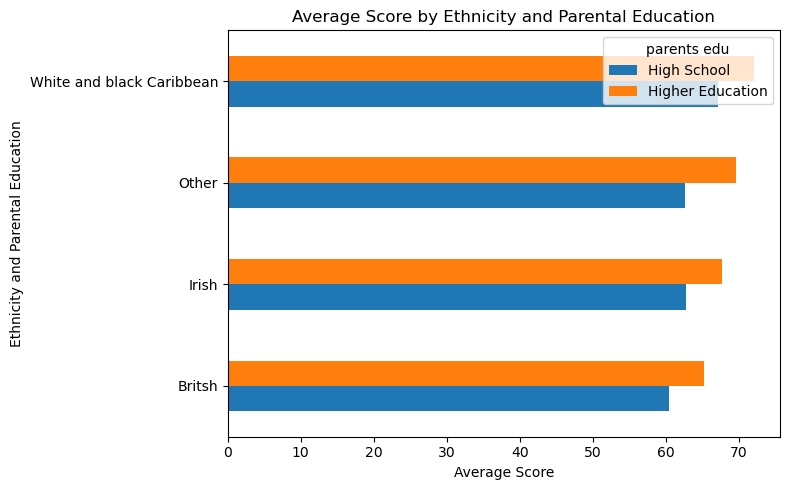

In [532]:
# school_prfmc.groupby([school_prfmc['Ethnicity'], school_prfmc['parents edu']])['Average score'].agg('mean').unstack().plot(kind='barh')
# # school_prfmc[['Ethnicity', 'parents education']]
# Group by 'Ethnicity' and 'parents edu', calculate the mean of 'Average score', and plot a horizontal bar chart
# fig, ax = plt.subplots(figsize=(10, 6))
# # ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')
# school_prfmc.groupby(['Ethnicity', 'parents edu'])['Average score'].agg('mean').unstack().plot(kind='barh',
#                                                                                               title='Average Score by Ethnicity and Parental Education',
#                                                                                               xlabel='Average Score',
#                                                                                               ylabel='Ethnicity and Parental Education',
#                                                                                               figsize=((8, 5)))

EPA = school_prfmc.groupby(['Ethnicity', 'parents edu'])['Average score'].agg('mean').unstack().plot(kind='barh',
                                                                                                figsize=(8, 5),
                                                                                                    title='Average Score by Ethnicity and Parental Education')
plt.tight_layout()
EPA.set_xlabel('Average Score')
EPA.set_ylabel('Ethnicity and Parental Education')
plt.tight_layout()
plt.savefig('average_score_by_ethnicity.png')
plt.show()


### 5- lunch which category students make better on therescore

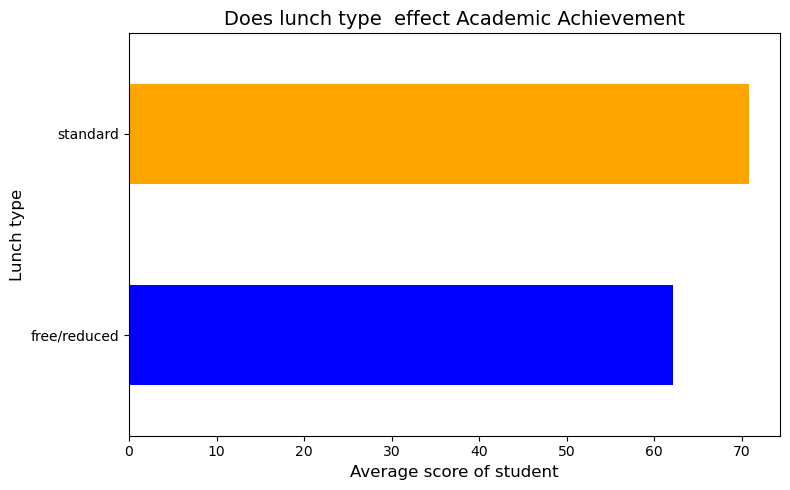

In [491]:
# Line Plot
lunch_avg=school_prfmc.groupby('lunch')['Average score'].agg('mean')
lunch_avg.plot(kind='barh', color=['blue', 'orange'],figsize=(8,5))
# fig, ax1 = plt.subplots(figsize=(8, 5))
plt.title('Does lunch type  effect Academic Achievement', fontsize=14) 
plt.xlabel('Average score of student', fontsize=12) 
plt.ylabel('Lunch type', fontsize=12) 
plt.tight_layout()
# plt.show()
plt.savefig('Does lunch type  effect Academic Achievement.png')
# school_prfmc.groupby(school_prfmc['lunch'])['Average score'].agg('mean').plot(kind='bar',
#                                                                              color='purple',
#                                                                              title='Does Lunch Type Influences Academic Achievement?',
#                                                                              xlabel='Lunch Type',
#                                                                              ylabel='Average Score of students')

In [493]:
school_prfmc['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

### 5- do the test preparation course make the students  get higher score?


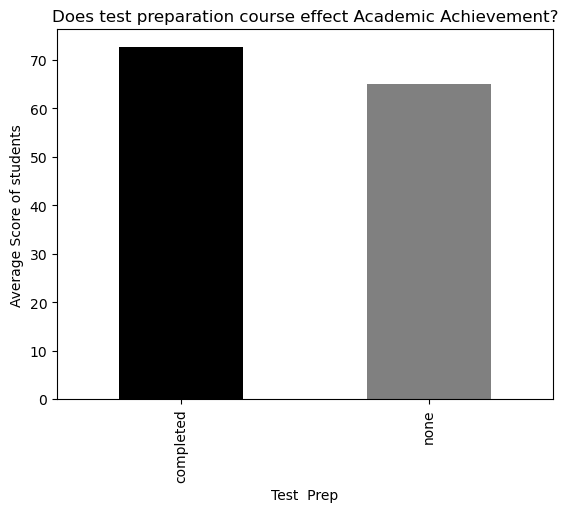

In [502]:
test=school_prfmc.groupby('test preparation course')['Average score'].agg('mean').plot(kind='bar',
                                                                                 color=('black','gray'))

test.set_title('Does test preparation course effect Academic Achievement?')
test.set_xlabel('Test  Prep')
test.set_ylabel('Average Score of students')
plt.savefig('Does test preparation course effect Academic Achievement')

### 6- what is the maximum and minimum score for each race, math, writing and reading score?

In [576]:
math=school_prfmc.groupby('Ethnicity')['math score'].agg('mean')
write=school_prfmc.groupby('Ethnicity')['writing score'].agg('mean')
read=school_prfmc.groupby('Ethnicity')['reading score'].agg('mean')

In [592]:
combined_scores = pd.concat([math, write, read], axis=1)
combined_scores.columns = ['Math Score', 'Writing Score', 'Reading Score']
combined_scores.describe()

,Math Score,Writing Score,Reading Score
count,4.000000,4.000000,4.000000
mean,64.789434,66.671580,68.051216
std,3.422306,3.355372,2.716662
min,61.629213,62.674157,64.674157
25%,62.996777,64.868539,66.683013
50%,63.958291,66.713793,68.228040
75%,65.750947,68.516834,69.596243
max,69.611940,70.584577,71.074627


##### ignore or try with it your choice

In [600]:
# # max_min = school_prfmc.groupby('Ethnicity')[['math score', 'reading score', 'writing score']].agg(['min', 'max'])
# # max_min.plot(kind='bar')
# # high_scores = school_prfmc.groupby('Ethnicity')[['math score', 'reading score', 'writing score']].max()
# # low_scores = school_prfmc.groupby('Ethnicity')[['math score', 'reading score', 'writing score']].min()
# # high_subject = high_scores.idxmax(axis=1)
# # low_subject = low_scores.idxmin(axis=1)
# # scores = pd.DataFrame({
# #     'Highest Score': high_scores.max(axis=1),
# #     'Lowest Score': low_scores.min(axis=1),
# #     'Highest Subject': high_subject,
# #     'Lowest Subject': low_subject
# # })

# # scores.plot(kind='bar')
# average_scores = school_prfmc.groupby('Ethnicity')[['math score', 'reading score', 'writing score']].mean()
# average_scores = school_prfmc.groupby('Ethnicity')[['math score', 'reading score', 'writing score']].mean()

# highest_avg_subject = average_scores.idxmax(axis=1)
# highest_avg_score = average_scores.max(axis=1)

# lowest_avg_subject = average_scores.idxmin(axis=1)
# lowest_avg_score = average_scores.min(axis=1)

# combined_scores = pd.DataFrame({
#     'Highest Average Score': highest_avg_score,
#     'Highest Subject': highest_avg_subject,
#     'Lowest Average Score': lowest_avg_score,
#     'Lowest Subject': lowest_avg_subject
# })

# fig, ax = plt.subplots(figsize=(12, 7))

# combined_scores[['Highest Average Score', 'Lowest Average Score']].plot(kind='barh', ax=ax, color=['green', 'red'])

# # Customize the plot
# ax.set_title('Highest and Lowest Average Scores by Ethnicity')
# ax.set_xlabel('Average Score')
# ax.set_ylabel('Ethnicity')
# ax.set_xlim(0, 100)
# ax.grid(axis='x', linestyle='--', alpha=0.7)

# for i, (highest, lowest) in enumerate(zip(combined_scores['Highest Subject'], combined_scores['Lowest Subject'])):
#     ax.text(combined_scores['Highest Average Score'].iloc[i] + 2, i,
#             highest, fontsize=10)
#     ax.text(combined_scores['Lowest Average Score'].iloc[i] - 2, i,
#             lowest, fontsize=10)


# plt.tight_layout()
# plt.show()


In [602]:
data_eth={'Math':school_prfmc.groupby('Ethnicity')['math score'].agg('mean'),
         'reading':school_prfmc.groupby('Ethnicity')['reading score'].agg('mean'),
         'writing':school_prfmc.groupby('Ethnicity')['writing score'].agg('mean') }


In [424]:
school_prfmc['Ethnicity'].unique()

array(['Irish', 'Other', 'Unkown', 'White and black Caribbean'],
      dtype=object)

<!-- 2- we find the gender/ avg score which better
3- race and ethnicity and parental level of edu avg score? some student  the first language is not english exam: asia students 
4- lunch which catogery students make better on there score
5- do the test prep course make the students get higher grades
6- what is the max and min score for each race math write read write. -->

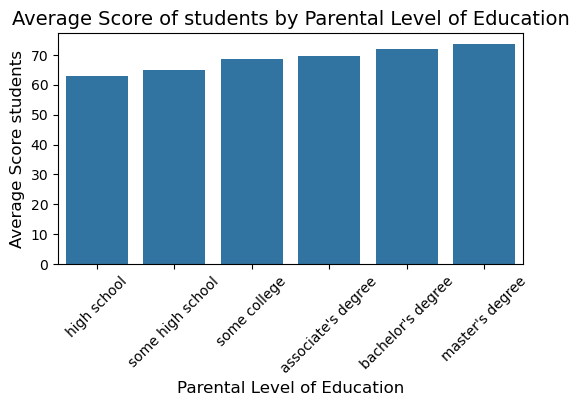

In [426]:
plt.figure(figsize=(6, 3))
sns.barplot(x=filtereddd.index, y=filtereddd['Average score'])
plt.xlabel("Parental Level of Education", fontsize=12)
plt.ylabel("Average Score students", fontsize=12)
plt.title("Average Score of students by Parental Level of Education", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
# plt.show()
plt.savefig('Average score by parental level of edu.png')


In [429]:
# school_prfmc.math_pass.value_counts().plot(kind = 'bar')

In [430]:
# school_prfmc.groupby([school_prfmc.gender, school_prfmc.math_pass]).math_pass.count().unstack().plot(kind='bar')

In [433]:
subjects = [s for s in school_prfmc.columns if '_pass' in s]
subjects

['Math_pass', 'Reading_pass', 'Writing_pass']

In [434]:
filt=school_prfmc[subjects]=='Pass'
filt

,Math_pass,Reading_pass,Writing_pass
0,True,True,True
1,True,True,True
2,True,True,True
3,False,False,False
4,True,True,True
...,...,...,...
995,True,True,True
996,True,False,False
997,False,True,True
998,True,True,True
